---

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey


## **Adtividad: RETO- Entega 1**



**Nombres y matrículas de los integrantes del equipo:**

**Adriana Fernanda Jiménez Avalos A01087695**

**Luis Alfredo Negron Naldos A01793865**


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

# **Librearias**

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

# Para obtener los datos
from sklearn.model_selection import RepeatedKFold
import requests
import zipfile
import io

# Para las manipulaciones y análisis de datos
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para los charts
import seaborn as sns
from matplotlib import pyplot as plt


# Para pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor


# Modelos a correr
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [184]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 507 kB/s 
     |████████████████████████████████| 1.0 MB 46.9 MB/s 
     |████████████████████████████████| 1.7 MB 36.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 39.9 MB/s 
     |████████████████████████████████| 6.3 MB 36.8 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=8e8a949f59844267194cabcdd4693ae22ff2ad65f75e19ec0a044c357cd8d71f
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=daa98f52ad8dcfbec1bb0571e70370bc405d8f27be830ba870c54f8329605209
  Stored in directory: /root/.

# **Ejercicio-1.** 
 En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado. 

In [2]:
#####################################################################
# Ejercicio 1:                                                      #
# Obtener los datos del conjunto Calidad de Agua                    #
#####################################################################

# Definir la url de donde obtener los datos:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

# Obtener la respuesta:
response = requests.get(url, stream=True)

# Tomar respuesta como Zip en cache:
zip = zipfile.ZipFile(io.BytesIO(response.content))

# Extraer todos los archivos del zip en nuestro espacio local:
zip.extractall("./")

In [43]:
#####################################################################
# Ejercicio 1:                                                      #
# Obtener los datos del conjunto Calidad de Agua                                                #
#####################################################################

# Leer el csv y usando el header que recién construimos:
df = pd.read_csv('/content/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', encoding='latin1')

# Filtrar la lista por las variables de interés:
df.head()




,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO




```
# Esto tiene formato de código
```

# **Ejercicio-1.1: Limpieza de datos.**
 

In [31]:
df.isnull().values.any()
#Verificamos que si hay valores faltantes. 

True

In [45]:
df.isnull().any()
#Verficamos en que columnas tienen valores faltantes 


CLAVE                     True
SITIO                     True
ORGANISMO_DE_CUENCA       True
ESTADO                    True
MUNICIPIO                 True
CUENCA                    True
CUERPO DE AGUA            True
TIPO                      True
SUBTIPO                   True
LONGITUD                  True
LATITUD                   True
PERIODO                   True
DBO_mg/L                  True
CALIDAD_DBO               True
DQO_mg/L                  True
CALIDAD_DQO               True
SST_mg/L                  True
CALIDAD_SST               True
COLI_FEC_NMP_100mL        True
CALIDAD_COLI_FEC          True
E_COLI_NMP_100mL          True
CALIDAD_E_COLI            True
ENTEROC_NMP_100mL         True
CALIDAD_ENTEROC           True
OD_PORC                   True
CALIDAD_OD_PORC           True
OD_PORC_SUP               True
CALIDAD_OD_PORC_SUP       True
OD_PORC_MED               True
CALIDAD_OD_PORC_MED       True
OD_PORC_FON               True
CALIDAD_OD_PORC_FON       True
TOX_D_48

In [46]:
df.info()
#Verificamos la cantida de datos faltantes por columna. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [64]:
#Generamos una copia de la base de datos original
df2=df.copy()

In [71]:
#Eliminamos las columnas que no tienen datos
df2.drop(['TOX_D_48_FON_UT','CALIDAD_TOX_D_48_FON','TOX_FIS_FON_15_UT','CALIDAD_TOX_FIS_FON_15'], axis=1, inplace = True)


In [72]:
#Verificamos la cantidad de datos faltantes en la nueva base de datos 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [83]:
df3= df2.copy()

In [87]:
#Borramos las filas donde toda la fila entera que no tiene valores. 
df3.dropna(axis='index', how='all', inplace= True)

In [88]:
df3.isna().sum()

CLAVE                        0
SITIO                        0
ORGANISMO_DE_CUENCA          0
ESTADO                       0
MUNICIPIO                    0
CUENCA                       1
CUERPO DE AGUA              14
TIPO                         0
SUBTIPO                     14
LONGITUD                     0
LATITUD                      0
PERIODO                      0
DBO_mg/L                   912
CALIDAD_DBO                912
DQO_mg/L                   912
CALIDAD_DQO                912
SST_mg/L                     4
CALIDAD_SST                  4
COLI_FEC_NMP_100mL         911
CALIDAD_COLI_FEC           911
E_COLI_NMP_100mL           911
CALIDAD_E_COLI             911
ENTEROC_NMP_100mL         2589
CALIDAD_ENTEROC           2589
OD_PORC                   1696
CALIDAD_OD_PORC           1696
OD_PORC_SUP               1874
CALIDAD_OD_PORC_SUP       1874
OD_PORC_MED               3006
CALIDAD_OD_PORC_MED       3006
OD_PORC_FON               2547
CALIDAD_OD_PORC_FON       2547
TOX_D_48

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [92]:
df3.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15',
       'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO', 'CUMPLE_CON_DQO',
       'CUMPLE_CON_SST', 'CUMPLE_CON_CF', 'CUMPLE_CON_E_COLI',
       'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD', 'CUMPLE_CON_TOX', 'GRUPO'],
      dtype='object')

**ANALISIS**

> Luego de revisar los cantidad de datos faltantes por columna, el equipo determino crear una subconjunto denominado df_final donde solo trabajaremos con aquellos columnas que tengan más de 3000 datos, las demás columnas tienen más de 10% de datos faltantes. 


In [93]:
df_final= df3.copy()
df_final.drop(['DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15'], axis=1, inplace = True)

In [94]:
#Esta se convierte en nuestra base de datos final..... 
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE                3493 non-null   object 
 1   SITIO                3493 non-null   object 
 2   ORGANISMO_DE_CUENCA  3493 non-null   object 
 3   ESTADO               3493 non-null   object 
 4   MUNICIPIO            3493 non-null   object 
 5   CUENCA               3492 non-null   object 
 6   CUERPO DE AGUA       3479 non-null   object 
 7   TIPO                 3493 non-null   object 
 8   SUBTIPO              3479 non-null   object 
 9   LONGITUD             3493 non-null   float64
 10  LATITUD              3493 non-null   float64
 11  PERIODO              3493 non-null   float64
 12  SEMAFORO             3493 non-null   object 
 13  CONTAMINANTES        2226 non-null   object 
 14  CUMPLE_CON_DBO       3493 non-null   object 
 15  CUMPLE_CON_DQO       3493 non-null   o

# 1.2 ANALISIS 

In [150]:
#####################################################################
#                                                                   #
# Hicimo una función para analizar las variables                    #
#####################################################################

def f_analyzeVariable(columna, tipo, chart, includeTukey=False):
  print(f'---------------------------------------------------')
  print(f'Análisis de la variable: {columna} ')
  print(f'---------------------------------------------------')
  
  ## En general:
  # Vamos a crear dos figuras

  # Definamos un dataframe solo con la columna elegida vs la objetivo
  objetivo = df_final.columns[12]
  inner_df = df_final[[columna, objetivo]]  

  # Algunos datos importantes de la variable a analizar (nombre y nulos)
  print(f'Tipo de variable: {tipo}')
  print(f'Cantidad de nulos: {df_final[columna].isna().sum()}')
  

  ## Si la variable es numérica:
  if(tipo=='numerica'):

    # Empecemos por un histograma:
    inner_df[columna].hist(figsize=(20,10))
    #inner_df[columna].plot.box(figsize=(20,10))
    plt.show()

    # Describamos los datos:
    print(f"{inner_df[columna].describe()}")

    # Veamos la relación entre la variable elegida y la objetivo por una regresión lineal simple:
    #print(f'\n--------Relación categorica contra Semaforo---------\n')
    #plt.figure(figsize=(6, 4))
    #sns.regplot(x=columna, y=objetivo, data=inner_df)
    #plt.ylim(0,)
    #print(inner_df.corr())

  if(tipo=='numerica2'):

    # Empecemos por un histograma:
    #inner_df[columna].hist(figsize=(20,10))
    inner_df[columna].plot.box(figsize=(20,10))
    plt.show()

    # Describamos los datos:
    print(f"{inner_df[columna].describe()}")

    # Veamos la relación entre la variable elegida y la objetivo por una regresión lineal simple:
    #print(f'\n--------Relación categorica contra Semaforo---------\n')
    #plt.figure(figsize=(6, 4))
    #sns.regplot(x=columna, y=objetivo, data=inner_df)
    #plt.ylim(0,)
    #print(inner_df.corr())

  ## Si la variable es categorica:
  if (tipo=='categorica'):
    # Empecemos por una gráfica de conteo de valores únicos:
    inner_df[columna].value_counts(dropna=False).plot(kind=chart['tipo'], figsize=(20, 10))
    plt.title(columna)
    plt.xlabel(chart['xlabel'], labelpad=4)
    plt.ylabel(chart['ylabel'], labelpad=8)
    plt.show()

    # Analicemos relación entre las categorías y la variable objetivo:
    #print(f'\n--------Relación categorica contra objetivo---------\n')
    
    # Comencemos por un chart:
    #inner_df.groupby(by=[columna]).mean().plot(kind=chart['tipo'], figsize=(4, 2))
    #plt.title(columna)
    #plt.xlabel(chart['xlabel'], labelpad=4)
    #plt.ylabel(chart['ylabel'], labelpad=8)
    #plt.show()
 

  

### Análisis de "ORGANISMO_DE_CUENCA"

---------------------------------------------------
Análisis de la variable: ORGANISMO_DE_CUENCA 
---------------------------------------------------
Tipo de variable: categorica
Cantidad de nulos: 0


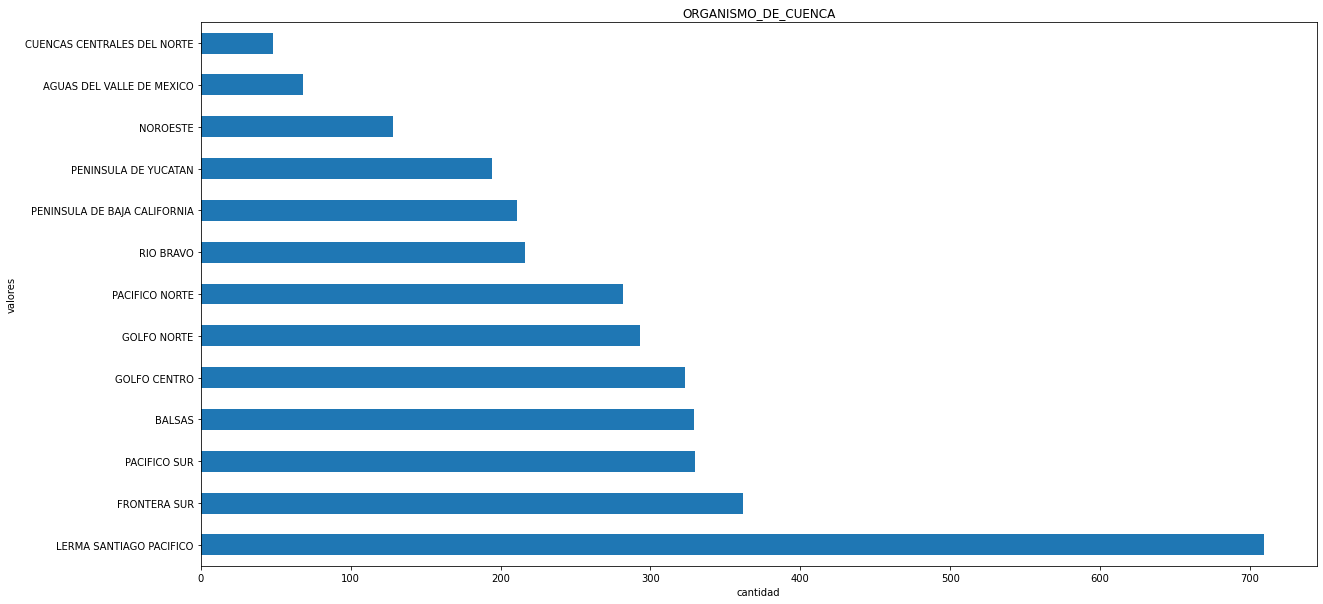

In [151]:
f_analyzeVariable(columna='ORGANISMO_DE_CUENCA', tipo='categorica', chart={'tipo':'barh', 'xlabel':'cantidad', 'ylabel':'valores'}, includeTukey=True)

### Análisis de "TIPO"


---------------------------------------------------
Análisis de la variable: TIPO 
---------------------------------------------------
Tipo de variable: categorica
Cantidad de nulos: 0


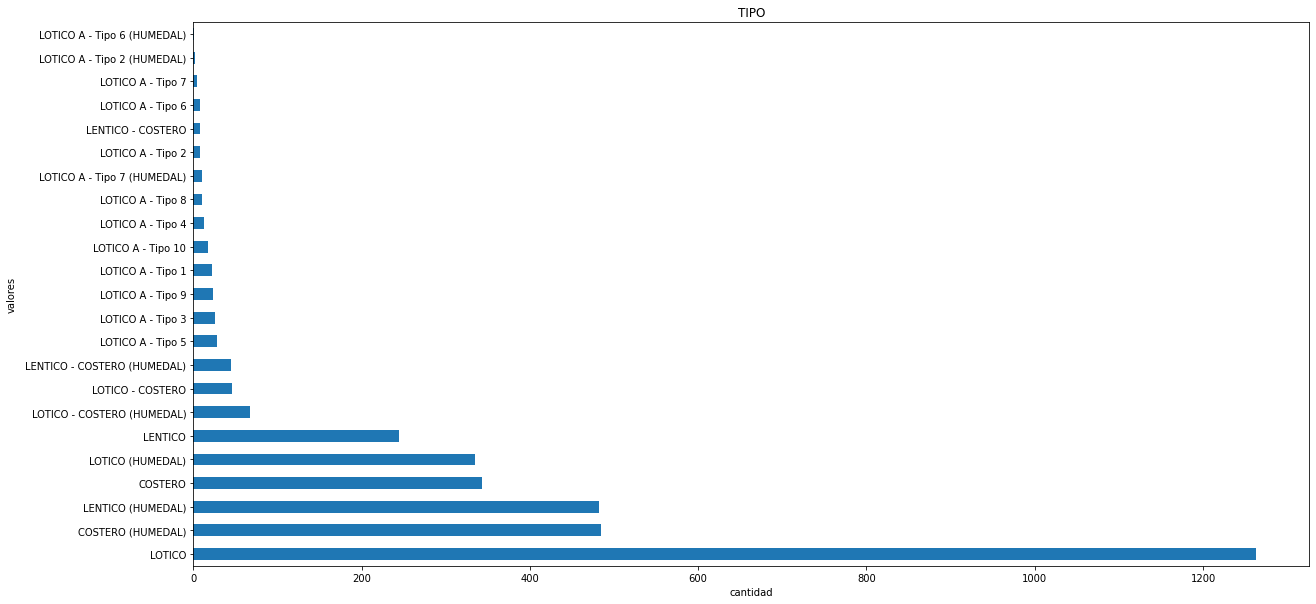

In [152]:
f_analyzeVariable(columna='TIPO', tipo='categorica', chart={'tipo':'barh', 'xlabel':'cantidad', 'ylabel':'valores'}, includeTukey=True)

### Análisis de "SUB TIPO "

---------------------------------------------------
Análisis de la variable: SUBTIPO 
---------------------------------------------------
Tipo de variable: categorica
Cantidad de nulos: 14


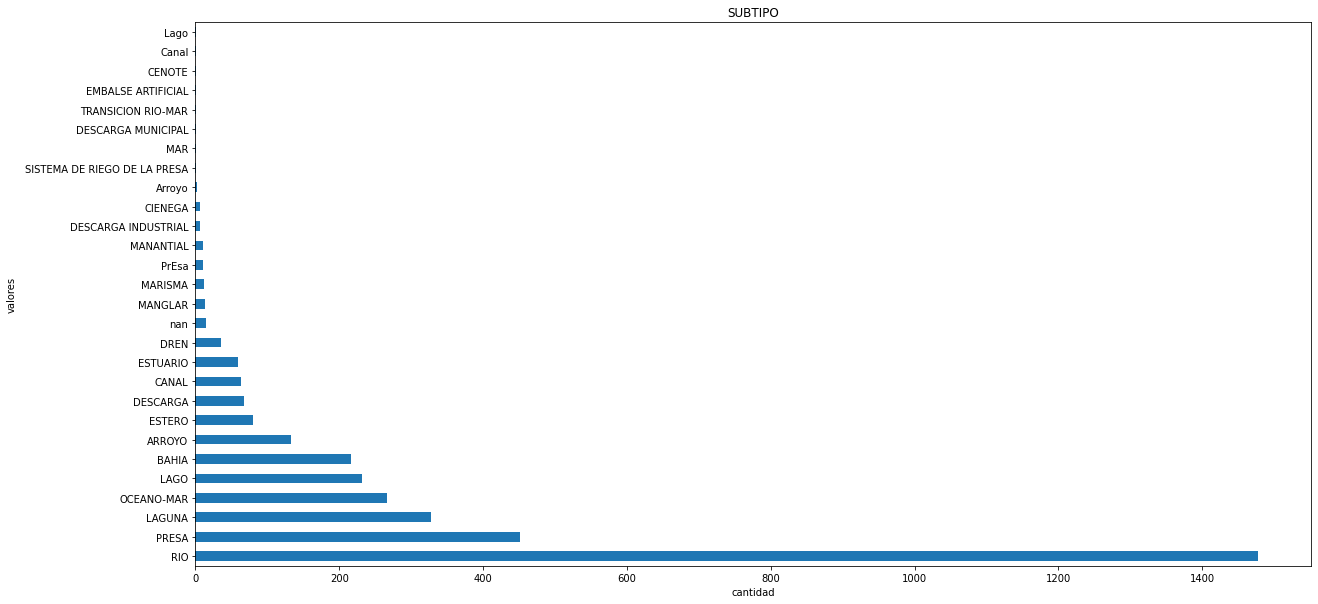

In [153]:
f_analyzeVariable(columna='SUBTIPO', tipo='categorica', chart={'tipo':'barh', 'xlabel':'cantidad', 'ylabel':'valores'}, includeTukey=True)

### Análisis de "CONTAMINANTES"

---------------------------------------------------
Análisis de la variable: CONTAMINANTES 
---------------------------------------------------
Tipo de variable: categorica
Cantidad de nulos: 1267


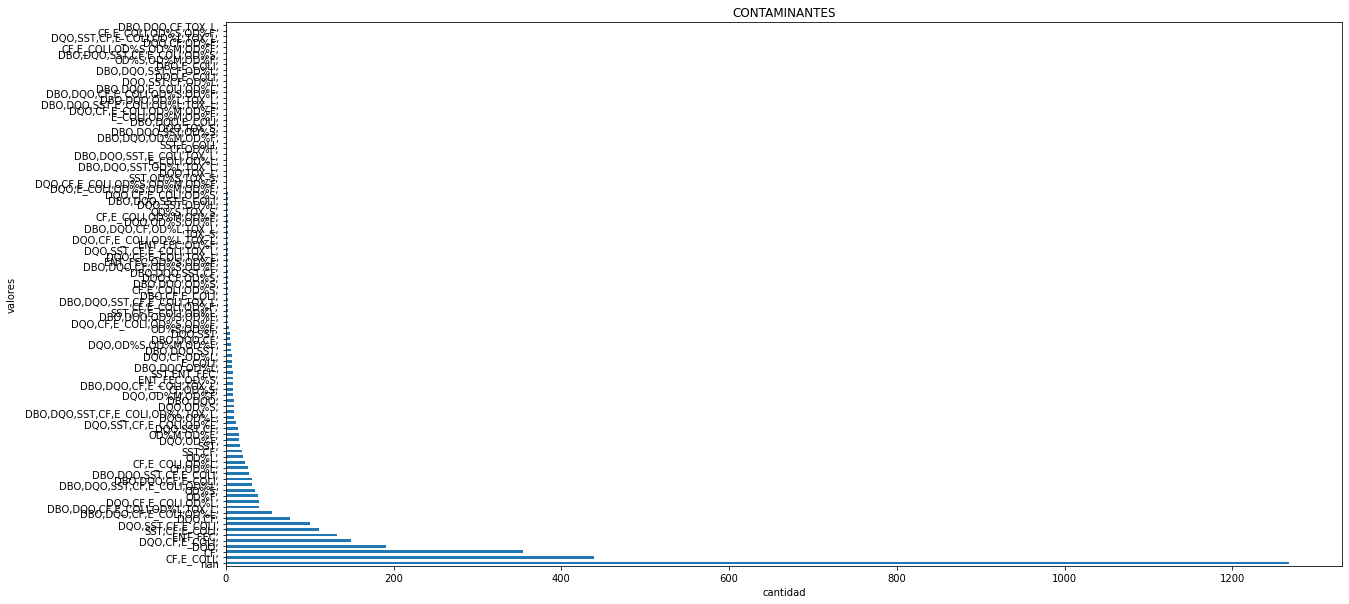

In [154]:
f_analyzeVariable(columna='CONTAMINANTES', tipo='categorica', chart={'tipo':'barh', 'xlabel':'cantidad', 'ylabel':'valores'}, includeTukey=True)

In [173]:
print(df_final.groupby('CONTAMINANTES').size())

CONTAMINANTES
CF,                     354
CF,E_COLI,              439
CF,E_COLI,OD%F,           3
CF,E_COLI,OD%L,          23
CF,E_COLI,OD%M,OD%F,      2
                       ... 
SST,CF,E_COLI,OD%L,       3
SST,ENT_FEC,              8
SST,E_COLI,               1
SST,OD%S,TOX_S,           1
TOX_S,                    2
Length: 96, dtype: int64


### Análisis de "SEMAFORO"

In [162]:
print(df_final.groupby('SEMAFORO').size())

SEMAFORO
Amarillo    1135
Rojo        1091
Verde       1267
dtype: int64


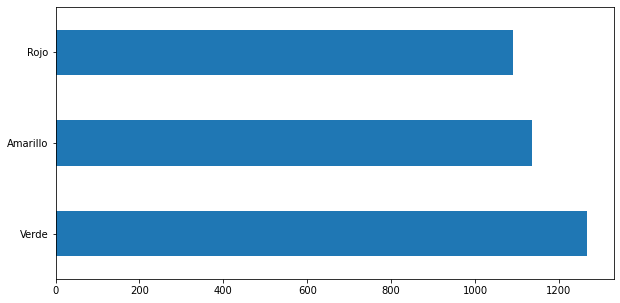

In [171]:
df_final['SEMAFORO'].value_counts(dropna=False).plot(kind='barh', figsize=(10, 5))


### Análisis de "CUMPLE CON DBO"

In [175]:
print(df_final.groupby('CUMPLE_CON_DBO').size())

CUMPLE_CON_DBO
ND     912
NO     262
SI    2319
dtype: int64


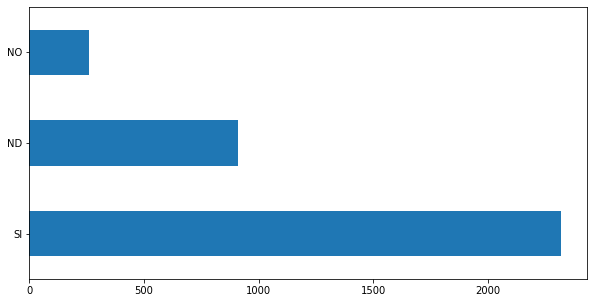

In [174]:
df_final['CUMPLE_CON_DBO'].value_counts(dropna=False).plot(kind='barh', figsize=(10, 5))

### Análisis de "CUMPLE CON DQO"

In [176]:
print(df_final.groupby('CUMPLE_CON_DQO').size())

CUMPLE_CON_DQO
ND     912
NO     931
SI    1650
dtype: int64


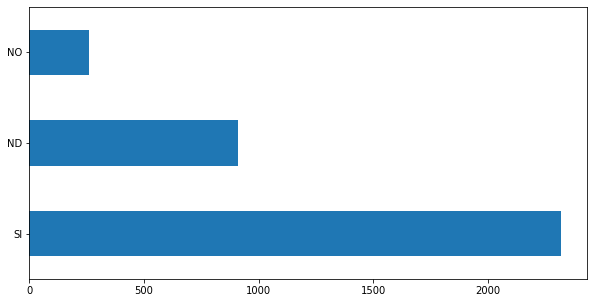

In [177]:
df_final['CUMPLE_CON_DBO'].value_counts(dropna=False).plot(kind='barh', figsize=(10, 5))

### Análisis de "LONGITUD"

---------------------------------------------------
Análisis de la variable: LONGITUD 
---------------------------------------------------
Tipo de variable: numerica
Cantidad de nulos: 0


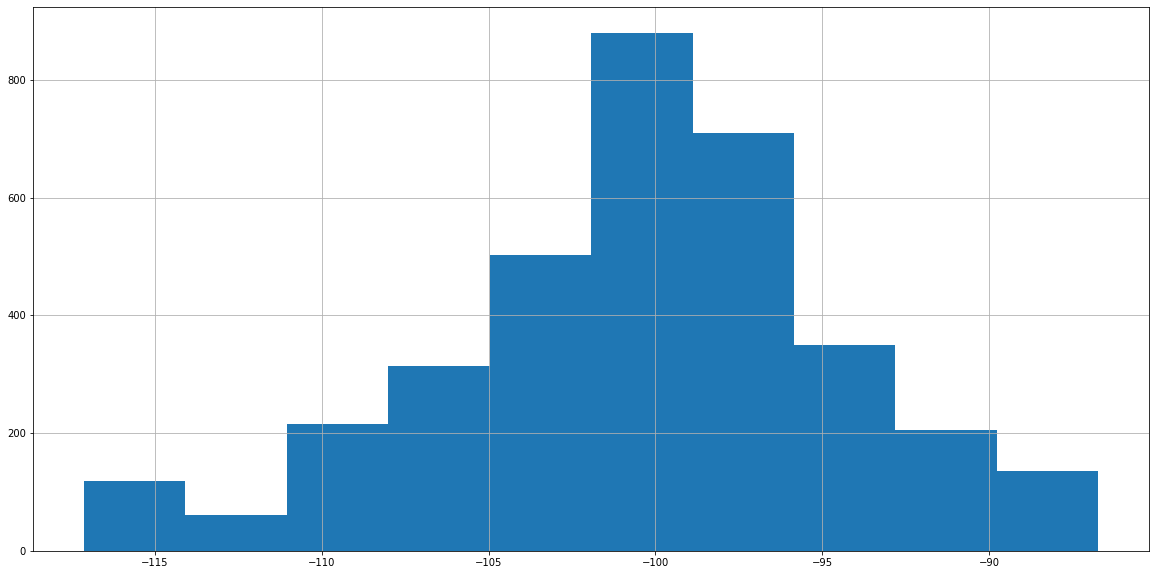

count    3493.000000
mean     -100.359969
std         6.122773
min      -117.124030
25%      -103.882310
50%       -99.795530
75%       -96.860230
max       -86.732150
Name: LONGITUD, dtype: float64


In [156]:
f_analyzeVariable(columna='LONGITUD', tipo='numerica', chart={'tipo':'barh', 'xlabel':'cantidad', 'ylabel':'valores'})

---------------------------------------------------
Análisis de la variable: LONGITUD 
---------------------------------------------------
Tipo de variable: numerica2
Cantidad de nulos: 0


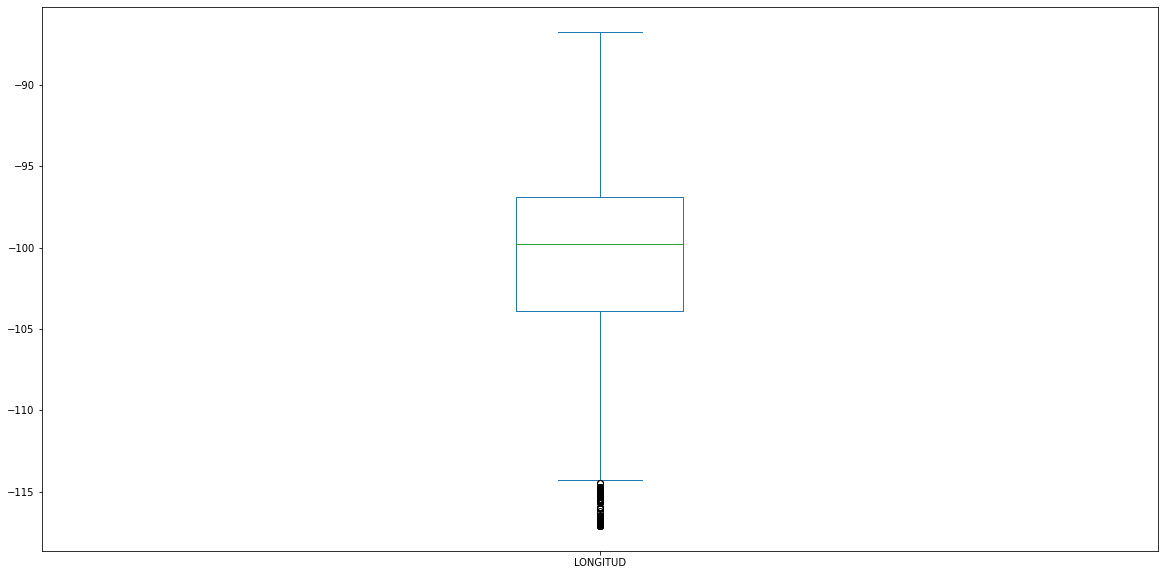

count    3493.000000
mean     -100.359969
std         6.122773
min      -117.124030
25%      -103.882310
50%       -99.795530
75%       -96.860230
max       -86.732150
Name: LONGITUD, dtype: float64


In [157]:
f_analyzeVariable(columna='LONGITUD', tipo='numerica2', chart={'tipo':'barh', 'xlabel':'cantidad', 'ylabel':'valores'})

### Análisis de "LATITUD"

---------------------------------------------------
Análisis de la variable: LATITUD 
---------------------------------------------------
Tipo de variable: numerica
Cantidad de nulos: 0


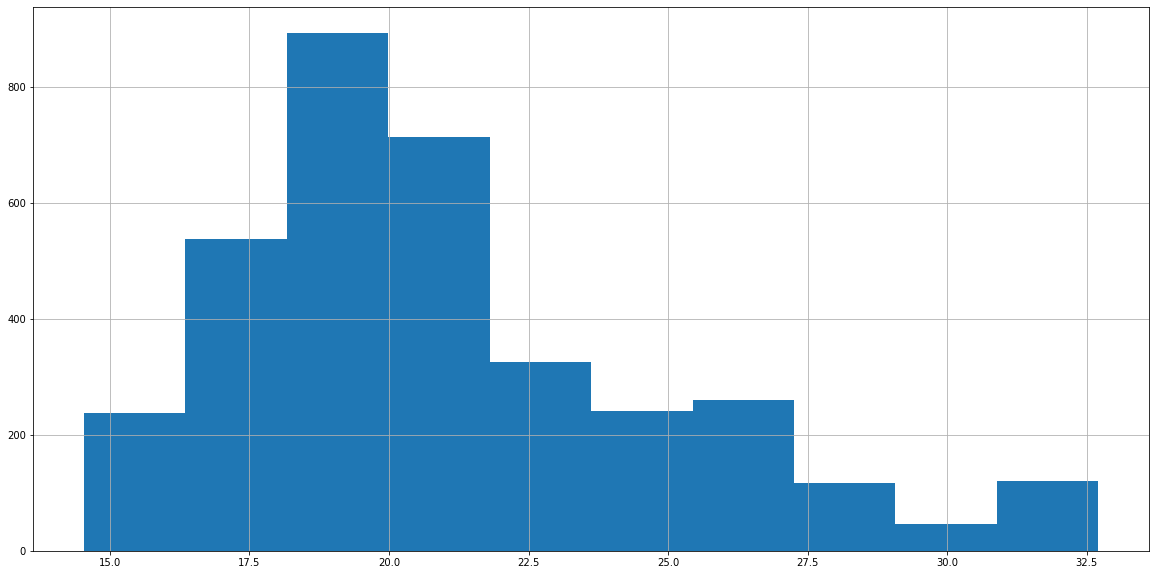

count    3493.000000
mean       21.046992
std         3.893696
min        14.534910
25%        18.396070
50%        20.148980
75%        22.828930
max        32.706500
Name: LATITUD, dtype: float64


In [158]:
f_analyzeVariable(columna='LATITUD', tipo='numerica', chart={'tipo':'barh', 'xlabel':'cantidad', 'ylabel':'valores'})

---------------------------------------------------
Análisis de la variable: LATITUD 
---------------------------------------------------
Tipo de variable: numerica2
Cantidad de nulos: 0


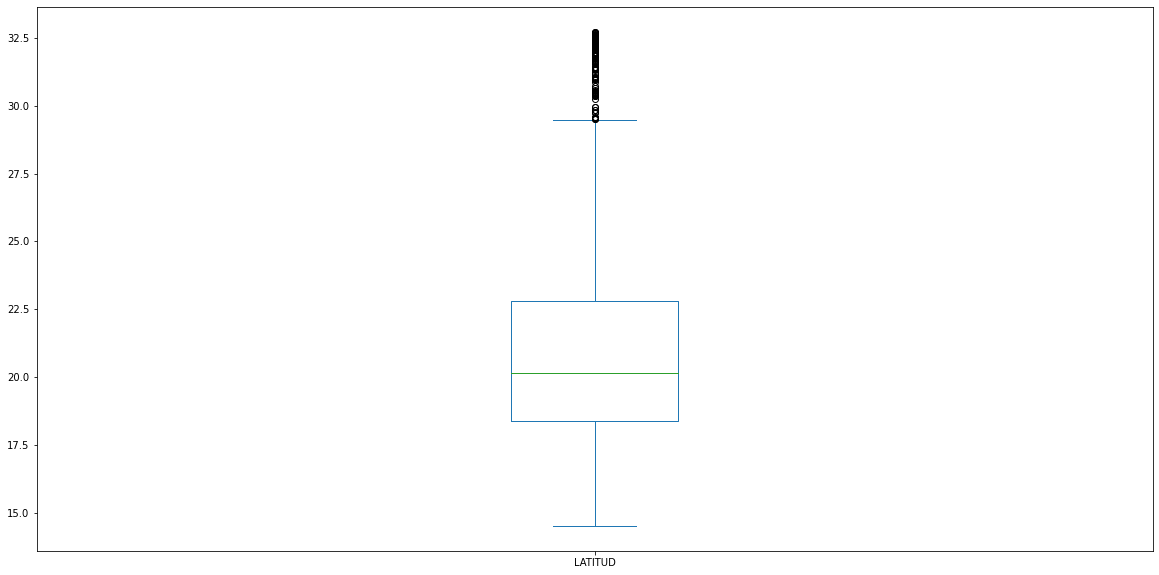

count    3493.000000
mean       21.046992
std         3.893696
min        14.534910
25%        18.396070
50%        20.148980
75%        22.828930
max        32.706500
Name: LATITUD, dtype: float64


In [159]:
f_analyzeVariable(columna='LATITUD', tipo='numerica2', chart={'tipo':'barh', 'xlabel':'cantidad', 'ylabel':'valores'})

#1.3 relación entre la calidad del agua y su ubicación geográfica a través de K- means

In [233]:
latlong=df_final[["LATITUD","LONGITUD"]]

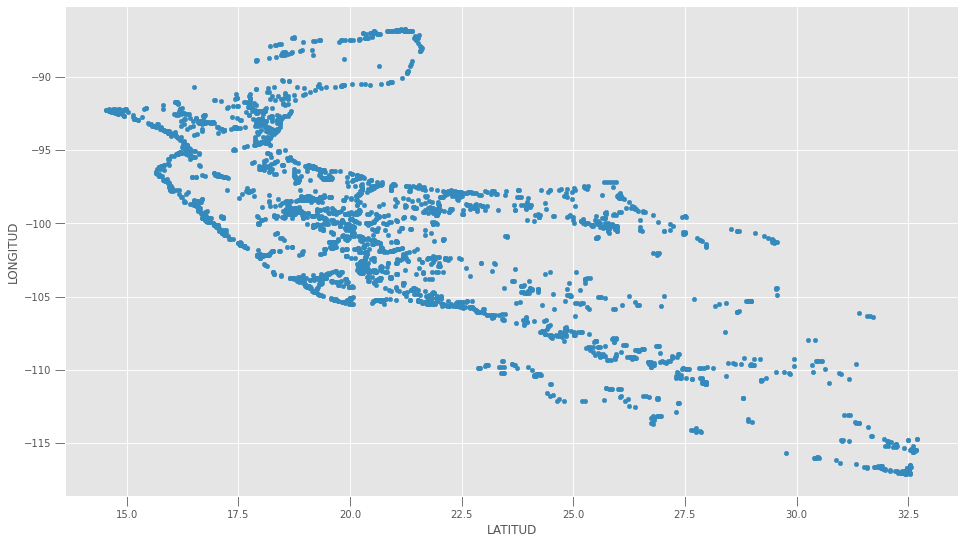

In [230]:
latlong.plot.scatter("LATITUD","LONGITUD")

In [231]:
latlong.describe()

,LATITUD,LONGITUD
count,3493.000000,3493.000000
mean,21.046992,-100.359969
std,3.893696,6.122773
min,14.534910,-117.124030
25%,18.396070,-103.882310
50%,20.148980,-99.795530
75%,22.828930,-96.860230
max,32.706500,-86.732150


In [185]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

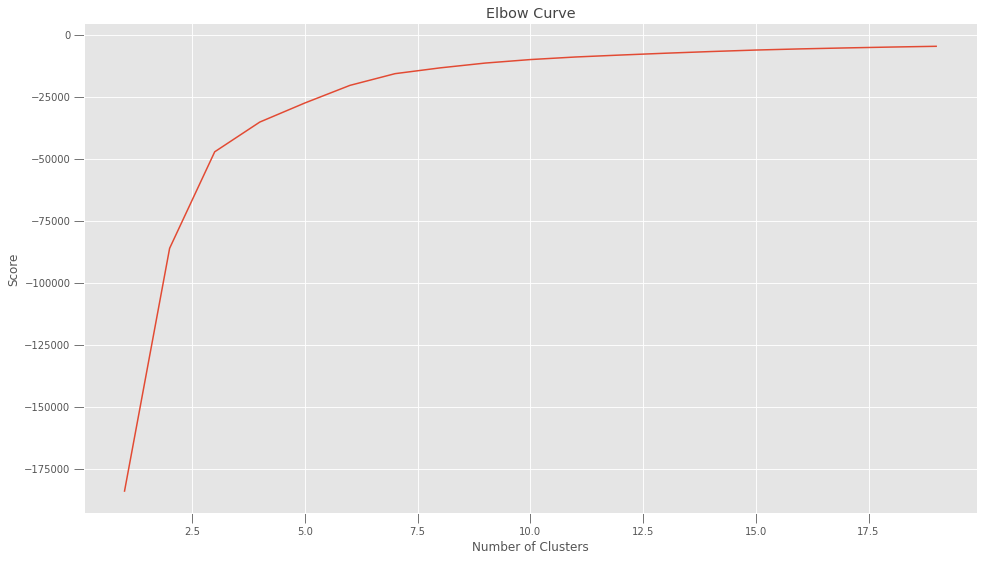

In [234]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# **Con 5 Clusters**


In [237]:
kmeans = KMeans(n_clusters=5
                ).fit(latlong)
centroids = kmeans.cluster_centers_
print(centroids)

[[  17.84328155  -91.98520227]
 [  18.84640806  -98.92112128]
 [  28.54666738 -111.59246864]
 [  24.3756531   -99.18655067]
 [  21.55627989 -104.46702415]]


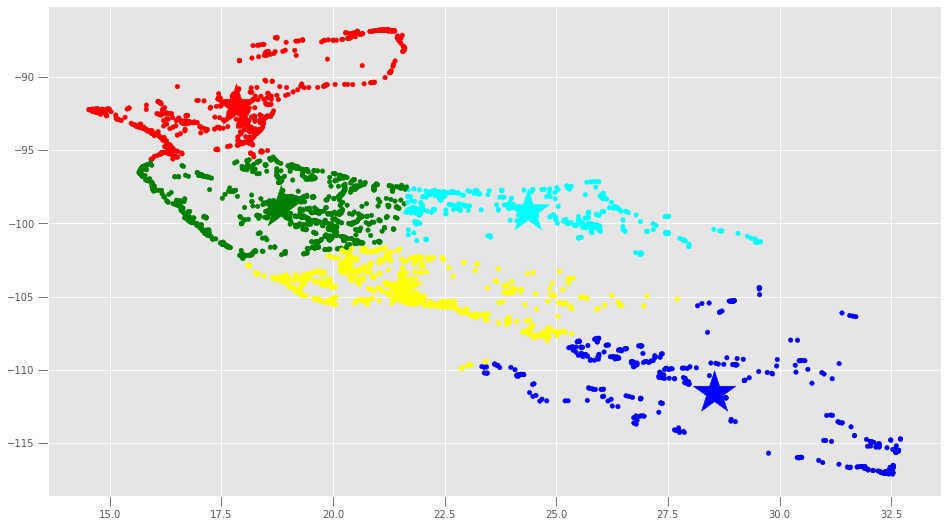

In [238]:
asignar=[]
C = kmeans.cluster_centers_
labels = kmeans.predict(latlong)
colores=['red','green','blue','cyan','yellow']
for row in labels:
    asignar.append(colores[row])
f1 = df['LATITUD'].values
f2 = df['LONGITUD'].values
output1 = f1[np.isfinite(f1)]
output2 = f2[np.isfinite(f2)]
 
plt.scatter(output1, output2 , c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=2000)
plt.show()

In [240]:
labels


array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [284]:
labels_pd=pd.DataFrame(labels)
labels_pd


,0
0,4
1,4
2,4
3,4
4,4
...,...
3488,3
3489,3
3490,3
3491,3


In [246]:
df_final=df_final.assign(Cluster= labels_pd)
df_final

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,Cluster
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,4
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,4
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,4
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,4
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,OCRBR5206M1,RIO SALADO PUENTE CARRETERO,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 11,RIO SALADO,LOTICO,RIO,-99.42142,...,SI,SI,SI,NO,NO,ND,SI,SI,LOTICO,3
3489,OCRBR5207M1,EL LAGUITO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,EL LAGUITO,LENTICO,LAGO,-99.53064,...,NO,NO,SI,NO,SI,ND,SI,SI,LENTICO,3
3490,OCRBR5208M1,PUENTE INTERNACIONAL I NUEVO LAREDO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,RIO BRAVO,LOTICO,RIO,-99.50727,...,SI,NO,SI,SI,SI,ND,SI,SI,LOTICO,3
3491,OCRBR5209M1,RIO BRAVO FRENTE A COMAPA,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 10,RIO BRAVO,LOTICO,RIO,-99.52221,...,SI,SI,SI,NO,SI,ND,SI,SI,LOTICO,3


In [264]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, latlong)
closest

array([1984, 1697, 2759, 2309, 1025])

In [265]:
#Ciudades representativas por Cluster"
users=df_final['ESTADO'].values
for row in closest:
    print(users[row])

CHIAPAS
MORELOS
SONORA
TAMAULIPAS
NAYARIT


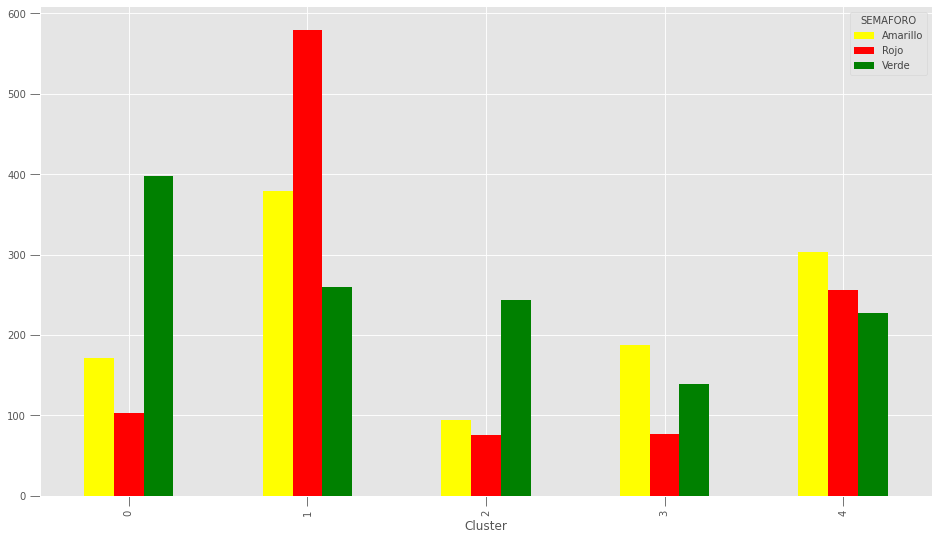

In [262]:
df_final.groupby('Cluster').SEMAFORO.value_counts().unstack(1).plot.bar(color={"Amarillo":"yellow","Rojo":"red","Verde":"green"})

**ANALISIS**

>Como se puede apreciar existe una diferencia significativa en la distribución proporcional de los niveles del semaforo por zonas. 
> En la zona 1, cercana a la ciudad de "Morelos", podemos observar que la cantidad de puntos en rojo es más relevante que en cualquier de las otras zonas, lo que demuestra que existe una diferencia por zonas de agrupación respecto a la calidad del agua representada en el semaforo. 

> Por otro lado la zona de Chiapas es la que tiene la mayor concetración de puntos en zona verde del semaforo. 



# 1.4 Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México

In [268]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [267]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [272]:
gdf = gpd.GeoDataFrame(
    df_final, geometry=gpd.points_from_xy(df_final.LONGITUD, df_final.LATITUD))

In [ ]:
gdf_CC = gpd.GeoDataFrame(labels_pd, geometry=gpd.points_from_xy(df_final.LONGITUD, df_final.LATITUD))
gdf_CC

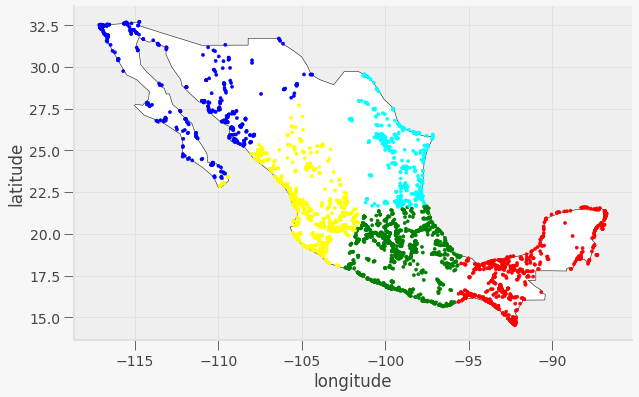

In [290]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

#gdf.plot(ax=gax, color='red', alpha = 0.5)
gdf_CC.plot(ax=gax, color= asignar, alpha = 1, markersize = 10)


gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)